In [29]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors
from matplotlib.colors import LogNorm

%matplotlib inline
from scipy.optimize import curve_fit, minimize
import strax
import straxbra
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
import matplotlib.patches as patches

In [30]:
ctx = straxbra.XebraContext()
run = '00054'
peaks_data_xebra = ctx.get_array(run, 'peaks')

In [31]:
waveform = peaks_data_xebra['data']
integral = peaks_data_xebra['area']
width = peaks_data_xebra['width'][:,6]
area_per_channel = peaks_data_xebra['area_per_channel']
full_window = [0,200]
first_peak_range = [0,15]
second_peak_range = [15,100]
local_range = [0,20]
right_limit = 8


# Define Cuts, printing command, parameters and the actual processing

In [32]:
def CutCondition(integral, width, i, int_limit1, int_limit2, left_lim,ratio,time, amplitude_ratio):
#    if integral[i] > 100 and integral[i] < 1000 and width[i] > 200 and width[i] < 600 \
#     and left_lim < 10 \
    if integral[i] > 50 and integral[i] < 2000 \
    and int_limit1 > 80 and int_limit1 < 2000 \
    and int_limit2 > 50 and int_limit2 < 150 \
    and ratio > 2 and ratio < 4 \
    and amplitude_ratio > 2 \
    :
        return(True)
    else:
        return(False)

In [33]:
def PrintWaveform(waveform, i):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(12, 3.5))
    ax1.plot(waveform[i])
    ax2.plot(waveform[i])
    plt.show()


In [34]:
def Params(waveform, i,full_window, first_peak_range, second_peak_range):
    
    window_max = waveform[i][full_window[0]: full_window[1]]
    total_maximum = max(window_max)
    selfmade_baseline = np.mean(waveform[i][195:])
    window1 = waveform[i][first_peak_range[0]: first_peak_range[1]]
    maximum1 = max(window1)
    window1 = list(window1)
    maximum1_index = window1.index(maximum1)
    left_lim = len(window1[0 : maximum1_index])
    int_limit1 = sum([selfmade_baseline + a for a in window1[maximum1_index-left_lim:maximum1_index +right_limit] ])
    window2 = waveform[i][second_peak_range[0]: second_peak_range[1]]
    maximum2 = max(window2)
    window2 = list(window2)
    maximum2_index = window2.index(maximum2)+len(window1)
    int_limit2 = sum([selfmade_baseline + b for b in window2[maximum2_index-len(window1)-left_lim:maximum2_index-len(window1) +right_limit] ])
    ratio = int_limit1/int_limit2
    time = (maximum2_index - maximum1_index)*10
    amplitude_ratio = maximum1/maximum2
    
    
    window_max = list(window_max)
    maximum1_index_global = window_max.index(maximum1)
    maximum2_index_global = window_max.index(maximum2)
    return (window_max, total_maximum, selfmade_baseline, window1, maximum1, maximum1_index, left_lim
           ,int_limit1, window2, maximum2, maximum2_index, int_limit2, ratio, time, amplitude_ratio, maximum1_index_global, maximum2_index_global)

In [35]:
def Sum(area_per_channel, i):
    
    PMT_sum = 0.5*sum(area_per_channel[i][1:7])
    
    return PMT_sum

In [36]:
def Process(waveform, i):
    
    window_max, total_maximum, selfmade_baseline, window1, maximum1, maximum1_index, left_lim,int_limit1, window2, maximum2, maximum2_index, int_limit2, ratio, time, amplitude_ratio,maximum1_index_global, maximum2_index_global   = Params(waveform, i,full_window, first_peak_range, second_peak_range)
    SelectionCutFlag = CutCondition(integral, width, i, int_limit1, int_limit2, left_lim, ratio,time, amplitude_ratio)
    
    
    
#     integral_per_channel = area_per_channel[:,1:]

    
    
    
    
    PrintingFlag = True


    if PrintingFlag and SelectionCutFlag:
#         PrintWaveform(waveform,i)
        
        peak_ratio.append(ratio)
        time_diff.append(time)
        cut_integral.append(integral[i])
        cut_width.append(width[i])
        maximum1_index_global_list.append(maximum1_index_global)
        maximum2_index_global_list.append(maximum2_index_global)

        
        
        
        window_max, total_maximum, selfmade_baseline, window1, maximum1, maximum1_index, left_lim,int_limit1, window2, maximum2, maximum2_index, int_limit2, ratio, time, amplitude_ratio, maximum1_index_global, maximum2_index_global = Params(waveform, i+1,full_window, first_peak_range, second_peak_range)
        SecondSelectionFlag = CutCondition(integral, width, i+1, int_limit1, int_limit2, left_lim, ratio,time, amplitude_ratio)
        if PrintingFlag and SecondSelectionFlag:
            if integral[i+2] > 30:


                if  area_per_channel[i+2][1] > Sum(area_per_channel, i+2) and area_per_channel[i+2][1] > 1 :
                    PMT1_light.append(area_per_channel[i+2][1])
                    PMT1_width.append(width[i+2])
                    PMT1_area.append(integral[i+2])
                if  area_per_channel[i+2][2] > Sum(area_per_channel, i+2) and area_per_channel[i+2][2] > 1 :
                    PMT2_light.append(area_per_channel[i+2][2])
                    PMT2_width.append(width[i+2])
                    PMT2_area.append(integral[i+2])
                if  area_per_channel[i+2][3] > Sum(area_per_channel, i+2) and area_per_channel[i+2][3] > 1 :
                    PMT3_light.append(area_per_channel[i+2][3])
                    PMT3_width.append(width[i+2])
                    PMT3_area.append(integral[i+2])
                if  area_per_channel[i+2][4] > Sum(area_per_channel, i+2) and area_per_channel[i+2][4] > 1 :
                    PMT4_light.append(area_per_channel[i+2][4])
                    PMT4_width.append(width[i+2])
                    PMT4_area.append(integral[i+2])
                if  area_per_channel[i+2][5] > Sum(area_per_channel, i+2) and area_per_channel[i+2][5] > 1 :
                    PMT5_light.append(area_per_channel[i+2][5])
                    PMT5_width.append(width[i+2])
                    PMT5_area.append(integral[i+2])
                if  area_per_channel[i+2][6] > Sum(area_per_channel, i+2) and area_per_channel[i+2][6] > 1 :
                    PMT6_light.append(area_per_channel[i+2][6])
                    PMT6_width.append(width[i+2])
                    PMT6_area.append(integral[i+2])
                if  area_per_channel[i+2][7] > Sum(area_per_channel, i+2) and area_per_channel[i+2][7] > 1 :
                    PMT7_light.append(area_per_channel[i+2][7])
                    PMT7_width.append(width[i+2])
                    PMT7_area.append(integral[i+2])
                

#                 PrintWaveform(waveform, i+2)
#                 print('S2 width: ', width[i+2])
                S2_integral.append(integral[i+2])
                S2_width.append(width[i+2])


            
        else:
            if integral[i+1] > 30:

                
                if  area_per_channel[i+1][1] > Sum(area_per_channel, i+1) and area_per_channel[i+1][1] > 1 :
                    PMT1_light.append(area_per_channel[i+1][1])
                    PMT1_width.append(width[i+1])
                    PMT1_area.append(integral[i+1])
                if  area_per_channel[i+1][2] > Sum(area_per_channel, i+1) and area_per_channel[i+1][2] > 1 :
                    PMT2_light.append(area_per_channel[i+1][2])
                    PMT2_width.append(width[i+1])
                    PMT2_area.append(integral[i+1])
                if  area_per_channel[i+1][3] > Sum(area_per_channel, i+1) and area_per_channel[i+1][3] > 1 :
                    PMT3_light.append(area_per_channel[i+1][3])
                    PMT3_width.append(width[i+1])
                    PMT3_area.append(integral[i+1])
                if  area_per_channel[i+1][4] > Sum(area_per_channel, i+1) and area_per_channel[i+1][4] > 1 :
                    PMT4_light.append(area_per_channel[i+1][4])
                    PMT4_width.append(width[i+1])
                    PMT4_area.append(integral[i+1])
                if  area_per_channel[i+1][5] > Sum(area_per_channel, i+1) and area_per_channel[i+1][5] > 1 :
                    PMT5_light.append(area_per_channel[i+1][5])
                    PMT5_width.append(width[i+1])
                    PMT5_area.append(integral[i+1])
                if  area_per_channel[i+1][6] > Sum(area_per_channel, i+1) and area_per_channel[i+1][6] > 1 :
                    PMT6_light.append(area_per_channel[i+1][6])
                    PMT6_width.append(width[i+1])
                    PMT6_area.append(integral[i+1])
                if  area_per_channel[i+1][7] > Sum(area_per_channel, i+1) and area_per_channel[i+1][7] > 1 :
                    PMT7_light.append(area_per_channel[i+1][7])
                    PMT7_width.append(width[i+1])
                    PMT7_area.append(integral[i+1])
                        


#                 PrintWaveform(waveform, i+1)
#                 print('S2 width: ', width[i+1])
                S2_integral.append(integral[i+1])
                S2_width.append(width[i+1])
        
        
        



        

    return()

In [37]:
#PMT0_light = []
PMT1_light = []
PMT2_light = []
PMT3_light = []
PMT4_light = []
PMT5_light = []
PMT6_light = []
PMT7_light = []

PMT0_width = []
PMT1_width = []
PMT2_width = []
PMT3_width = []
PMT4_width = []
PMT5_width = []
PMT6_width = []
PMT7_width = []

PMT0_area = []
PMT1_area = []
PMT2_area = []
PMT3_area = []
PMT4_area = []
PMT5_area = []
PMT6_area = []
PMT7_area = []


num_events = len(waveform)
cut_integral = []
cut_width = []
S2_integral = []
S2_width = []
peak_ratio = []
time_diff = []
maximum1_index_global_list = []
maximum2_index_global_list = []



for i in range(0,num_events):
    
    Process(waveform,i)

    


/software/anaconda3/envs/strax/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars
/software/anaconda3/envs/strax/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in float_scalars


# S2 Integral based on %area_per_channel cut (also includes PMT0)

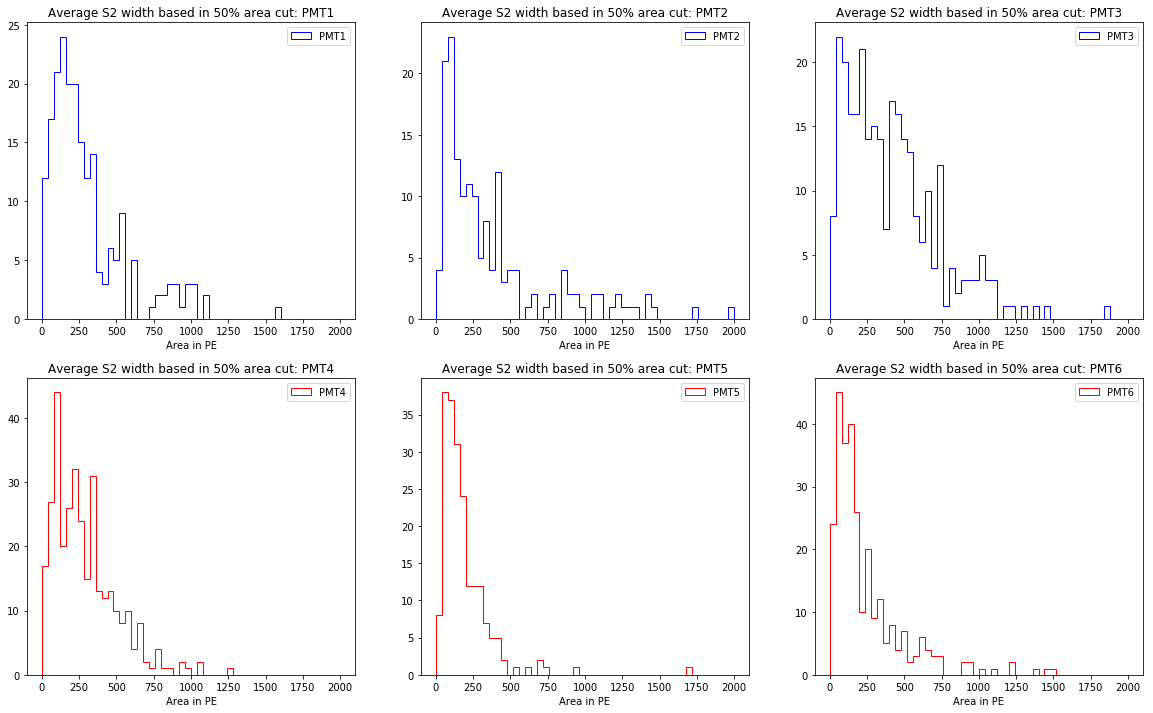

In [38]:
num_bins = 50

fig, ax = plt.subplots(2, 3, sharex=False, figsize=(20, 12))
ax[0,0].hist(PMT1_area, num_bins, range = [0,2000], histtype='step', color='blue', label='PMT1')
ax[0,0].set_xlabel('Area in PE')
ax[0,0].set_title('Average S2 width based in 50% area cut: PMT1')
ax[0,0].legend()
ax[0,0].legend(prop={'size': 10})
#print(len(PMT1_area))
ax[1,0].hist(PMT4_area, num_bins, range = [0,2000], histtype='step', color='red', label='PMT4')
ax[1,0].set_xlabel('Area in PE')
ax[1,0].set_title('Average S2 width based in 50% area cut: PMT4')
ax[1,0].legend()
ax[1,0].legend(prop={'size': 10})
#print(len(PMT4_area))

ax[0,1].hist(PMT2_area, num_bins, range = [0,2000], histtype='step', color='blue', label='PMT2')
ax[0,1].set_xlabel('Area in PE')
ax[0,1].set_title('Average S2 width based in 50% area cut: PMT2')
ax[0,1].legend()
ax[0,1].legend(prop={'size': 10})
#print(len(PMT2_area))
ax[1,1].hist(PMT5_area, num_bins, range = [0,2000], histtype='step', color='red', label='PMT5')
ax[1,1].set_xlabel('Area in PE')
ax[1,1].set_title('Average S2 width based in 50% area cut: PMT5')
ax[1,1].legend()
ax[1,1].legend(prop={'size': 10})
#print(len(PMT5_area))

ax[0,2].hist(PMT3_area, num_bins, range = [0,2000], histtype='step', color='blue', label='PMT3')
ax[0,2].set_xlabel('Area in PE')
ax[0,2].set_title('Average S2 width based in 50% area cut: PMT3')
ax[0,2].legend()
ax[0,2].legend(prop={'size': 10})
#print(len(PMT3_area))
ax[1,2].hist(PMT6_area, num_bins, range = [0,2000], histtype='step', color='red', label='PMT6')
ax[1,2].set_xlabel('Area in PE')
ax[1,2].set_title('Average S2 width based in 50% area cut: PMT6')
ax[1,2].legend()
ax[1,2].legend(prop={'size': 10})
#print(len(PMT6_area))


plt.show()

# Run this block before plotting below

In [39]:
def single_gaus(x, h, mu, sigma):

    gaus = h * np.exp(-(x-mu)**2         /(2*sigma**2))
    return gaus

n1, binEdges1 = np.histogram(PMT1_width, bins=np.linspace(200,2200,20))
n4, binEdges4 = np.histogram(PMT4_width, bins=np.linspace(200,2200,20))
n2, binEdges2 = np.histogram(PMT2_width, bins=np.linspace(200,2200,20))
n5, binEdges5 = np.histogram(PMT5_width, bins=np.linspace(200,2200,20))
n3, binEdges3 = np.histogram(PMT3_width, bins=np.linspace(200,2200,20))
n6, binEdges6 = np.histogram(PMT6_width, bins=np.linspace(200,2200,20))
n7, binEdges7 = np.histogram(PMT7_width, bins=np.linspace(200,2200,20))
bincenters1 = 0.5 * (binEdges1[1:] + binEdges1[:-1])
bincenters4 = 0.5 * (binEdges4[1:] + binEdges4[:-1])
bincenters2 = 0.5 * (binEdges2[1:] + binEdges2[:-1])
bincenters5 = 0.5 * (binEdges5[1:] + binEdges5[:-1])
bincenters3 = 0.5 * (binEdges3[1:] + binEdges3[:-1])
bincenters6 = 0.5 * (binEdges6[1:] + binEdges6[:-1])
bincenters7 = 0.5 * (binEdges7[1:] + binEdges7[:-1])
p0 =[10,900,200]
bounds = ((10, 500,50),(np.inf, 1600,np.inf ))

x_range = np.linspace(0,2200,100)

# Average S2 width based on %area_per_channel cut

PMT1 width:  672.946281706254       number of entries:  208
PMT4 width:  803.6643580795884       number of entries:  334
PMT2 width:  784.7662443718875        number of entries:  162
PMT5 width:  858.8744059775389       number of entries:  202
PMT3 width:  767.4071981444814       number of entries:  286
PMT6 width:  786.8846471644194       number of entries:  280
PMT1/PMT4 ratio should be close to 1:  0.8373474261248884
PMT2/PMT5 ratio should be close to 1:  0.9137147863647139
PMT3/PMT6 ratio should be close to 1:  0.9752473897030193


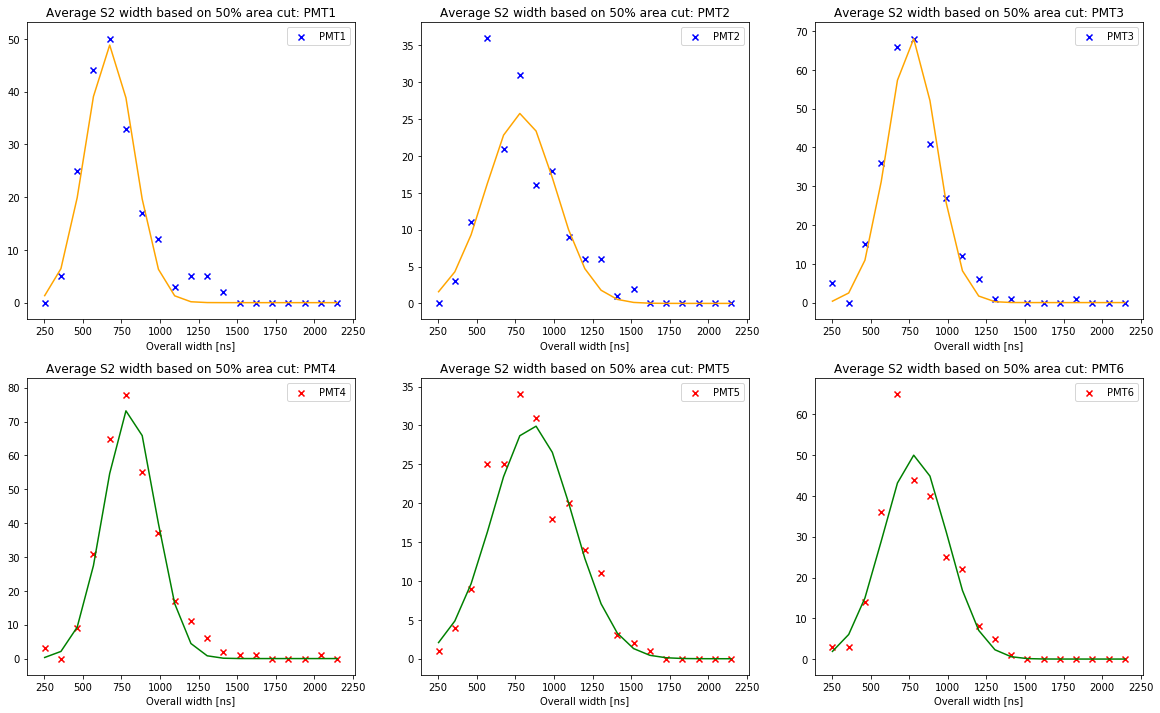

In [40]:
fig, ax = plt.subplots(2, 3, sharex=False, figsize=(20, 12))
popt1, pcov1 = curve_fit(single_gaus, bincenters1, n1, p0, bounds =bounds,  sigma=np.maximum(np.sqrt(n1), np.ones_like(n1)))
popt4, pcov4 = curve_fit(single_gaus, bincenters4, n4, p0, bounds =bounds,  sigma=np.maximum(np.sqrt(n4), np.ones_like(n4)))
popt2, pcov2 = curve_fit(single_gaus, bincenters2, n2, p0, bounds =bounds,  sigma=np.maximum(np.sqrt(n2), np.ones_like(n2)))
popt5, pcov5 = curve_fit(single_gaus, bincenters5, n5, p0, bounds =bounds,  sigma=np.maximum(np.sqrt(n5), np.ones_like(n5)))
popt3, pcov3 = curve_fit(single_gaus, bincenters3, n3, p0, bounds =bounds,  sigma=np.maximum(np.sqrt(n3), np.ones_like(n3)))
popt6, pcov6 = curve_fit(single_gaus, bincenters6, n6, p0, bounds =bounds,  sigma=np.maximum(np.sqrt(n6), np.ones_like(n6)))
popt7, pcov7 = curve_fit(single_gaus, bincenters7, n7, p0, bounds =bounds,  sigma=np.maximum(np.sqrt(n7), np.ones_like(n7)))
perr1 = np.sqrt(np.diag(pcov1))
perr2 = np.sqrt(np.diag(pcov2))
perr3 = np.sqrt(np.diag(pcov3))
perr4 = np.sqrt(np.diag(pcov4))
perr5 = np.sqrt(np.diag(pcov5))
perr6 = np.sqrt(np.diag(pcov6))
perr7 = np.sqrt(np.diag(pcov7))


ax[0,0].plot(bincenters1,single_gaus(bincenters1,*popt1), color = 'orange')
ax[0,0].scatter(bincenters1, n1, c ='b', marker = 'x', label = 'PMT1')
ax[0,0].set_xlabel('Overall width [ns]')
ax[0,0].set_title('Average S2 width based on 50% area cut: PMT1')
ax[0,0].legend()
ax[0,0].legend(prop={'size': 10})


ax[1,0].plot(bincenters4,single_gaus(bincenters4,*popt4), color = 'green')
ax[1,0].scatter(bincenters4, n4,c = 'red', marker = 'x', label = 'PMT4')
ax[1,0].set_xlabel('Overall width [ns]')
ax[1,0].set_title('Average S2 width based on 50% area cut: PMT4')
ax[1,0].legend()
ax[1,0].legend(prop={'size': 10})


ax[0,1].plot(bincenters2,single_gaus(bincenters2,*popt2), color = 'orange')
ax[0,1].scatter(bincenters2, n2, c = 'b', marker = 'x', label = 'PMT2')
ax[0,1].set_xlabel('Overall width [ns]')
ax[0,1].set_title('Average S2 width based on 50% area cut: PMT2')
ax[0,1].legend()
ax[0,1].legend(prop={'size': 10})

ax[1,1].plot(bincenters5,single_gaus(bincenters5,*popt5), color = 'green')
ax[1,1].scatter(bincenters5, n5,c = 'red', marker = 'x', label = 'PMT5')
ax[1,1].set_xlabel('Overall width [ns]')
ax[1,1].set_title('Average S2 width based on 50% area cut: PMT5')
ax[1,1].legend()
ax[1,1].legend(prop={'size': 10})

ax[0,2].plot(bincenters3,single_gaus(bincenters3,*popt3), color = 'orange')
ax[0,2].scatter(bincenters3, n3, c = 'b', marker = 'x', label = 'PMT3')
ax[0,2].set_xlabel('Overall width [ns]')
ax[0,2].set_title('Average S2 width based on 50% area cut: PMT3')
ax[0,2].legend()
ax[0,2].legend(prop={'size': 10})

ax[1,2].plot(bincenters6,single_gaus(bincenters6,*popt6), color = 'green')
ax[1,2].scatter(bincenters6, n6,c = 'red', marker = 'x', label = 'PMT6')
ax[1,2].set_xlabel('Overall width [ns]')
ax[1,2].set_title('Average S2 width based on 50% area cut: PMT6')
ax[1,2].legend()
ax[1,2].legend(prop={'size': 10})


print('PMT1 width: ', popt1[1], '      number of entries: ', len(PMT1_width))
print('PMT4 width: ', popt4[1], '      number of entries: ', len(PMT4_width))
print('PMT2 width: ', popt2[1], '       number of entries: ', len(PMT2_width))
print('PMT5 width: ', popt5[1], '      number of entries: ', len(PMT5_width))
print('PMT3 width: ', popt3[1], '      number of entries: ', len(PMT3_width))
print('PMT6 width: ', popt6[1], '      number of entries: ', len(PMT6_width))
print('PMT1/PMT4 ratio should be close to 1: ', popt1[1]/popt4[1])
print('PMT2/PMT5 ratio should be close to 1: ', popt2[1]/popt5[1])
print('PMT3/PMT6 ratio should be close to 1: ', popt3[1]/popt6[1])


plt.show()

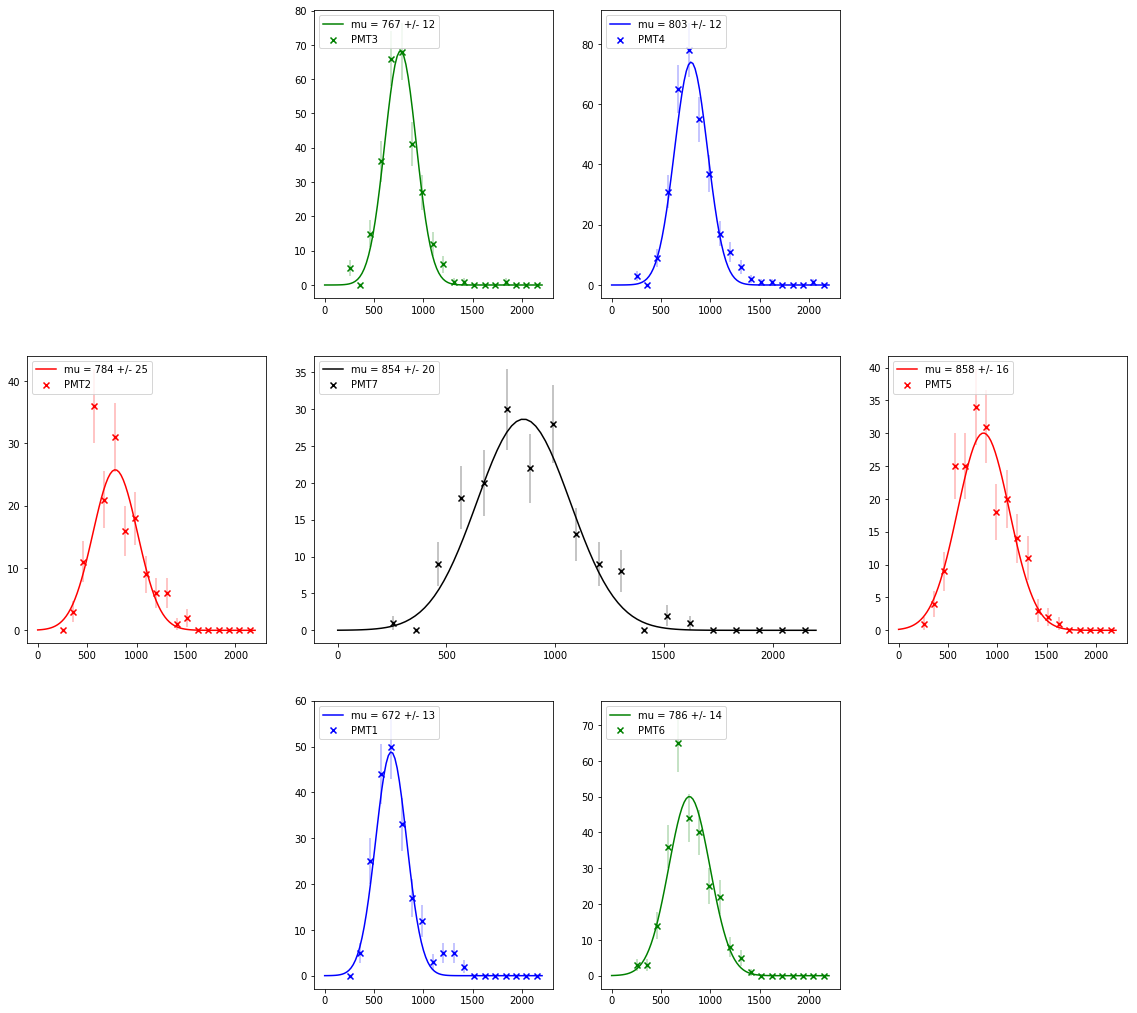

In [41]:

plt.figure(figsize=(30, 18))

G = gridspec.GridSpec(3, 6)

# axes_0 = plt.figure(G[0,1])

axes_1 = plt.subplot(G[2, 2])
axes_1.scatter(bincenters1, n1, c ='b', marker = 'x', label = 'PMT1')
axes_1.plot(x_range,single_gaus(x_range,*popt1), color = 'blue', label ='mu = '+str(int(popt1[1]))+' +/- '+str(int(perr1[1])))
axes_1.legend(prop={'size': 10}, loc = 'upper left')
axes_1.errorbar(bincenters1, n1, yerr=np.sqrt(n1), ecolor='blue', marker= '.', mec='blue', mfc= 'blue', alpha = 0.3, linestyle='None')

axes_2 =plt.subplot(G[1,1])
axes_2.scatter(bincenters2, n2, c='r', marker = 'x', label = 'PMT2')
axes_2.plot(x_range, single_gaus(x_range, *popt2), color = 'red', label ='mu = '+str(int(popt2[1]))+' +/- '+str(int(perr2[1])))
axes_2.legend(prop={'size': 10}, loc = 'upper left')
axes_2.errorbar(bincenters2, n2, yerr=np.sqrt(n2), ecolor='red', marker= '.', mec='red', mfc= 'red', alpha = 0.3, linestyle='None')

axes_3 = plt.subplot(G[0, 2])
axes_3.scatter(bincenters3, n3, c = 'g', marker = 'x', label = 'PMT3')
axes_3.plot(x_range, single_gaus(x_range,*popt3), color = 'green', label ='mu = '+str(int(popt3[1]))+' +/- '+str(int(perr3[1])))
axes_3.legend(prop={'size': 10}, loc = 'upper left')
axes_3.errorbar(bincenters3, n3, yerr=np.sqrt(n3), ecolor='green', marker= '.', mec='green', mfc= 'green', alpha = 0.3, linestyle='None')

axes_4= plt.subplot(G[0, 3])
axes_4.scatter(bincenters4, n4, c ='b', marker = 'x', label = 'PMT4')
axes_4.plot(x_range,single_gaus(x_range,*popt4), color = 'blue', label ='mu = '+str(int(popt4[1]))+' +/- '+str(int(perr4[1])))
axes_4.legend(prop={'size': 10}, loc = 'upper left')
axes_4.errorbar(bincenters4, n4, yerr=np.sqrt(n4), ecolor='blue', marker= '.', mec='blue', mfc= 'blue', alpha = 0.3, linestyle='None')

axes_5 = plt.subplot(G[1,4])
axes_5.scatter(bincenters5, n5, c='r', marker = 'x', label = 'PMT5')
axes_5.plot(x_range, single_gaus(x_range, *popt5), color = 'red', label ='mu = '+str(int(popt5[1]))+' +/- '+str(int(perr5[1])))
axes_5.legend(prop={'size': 10}, loc = 'upper left')
axes_5.errorbar(bincenters5, n5, yerr=np.sqrt(n5), ecolor='red', marker= '.', mec='red', mfc= 'red', alpha = 0.3, linestyle='None')

axes_6 = plt.subplot(G[2,3])
axes_6.scatter(bincenters6, n6, c = 'g', marker = 'x', label = 'PMT6' )
axes_6.plot(x_range, single_gaus(x_range, *popt6), color = 'green', label ='mu = '+str(int(popt6[1]))+' +/- '+str(int(perr6[1])))
axes_6.legend(prop={'size': 10}, loc = 'upper left')
axes_6.errorbar(bincenters6, n6, yerr=np.sqrt(n6), ecolor='green', marker= '.', mec='green', mfc= 'green', alpha = 0.3, linestyle='None')

axes_7 =plt.subplot(G[1, 2:4])
axes_7.scatter(bincenters7, n7, c = 'black', marker = 'x', label = 'PMT7' )
axes_7.plot(x_range, single_gaus(x_range, *popt7), color = 'black', label ='mu = '+str(int(popt7[1]))+' +/- '+str(int(perr7[1])))
axes_7.legend(prop={'size': 10}, loc = 'upper left')
axes_7.errorbar(bincenters7, n7, yerr=np.sqrt(n7), ecolor='black', marker= '.', mec='black', mfc= 'black', alpha = 0.3, linestyle='None')

plt.show()

# This one sums up all leveling attemps before

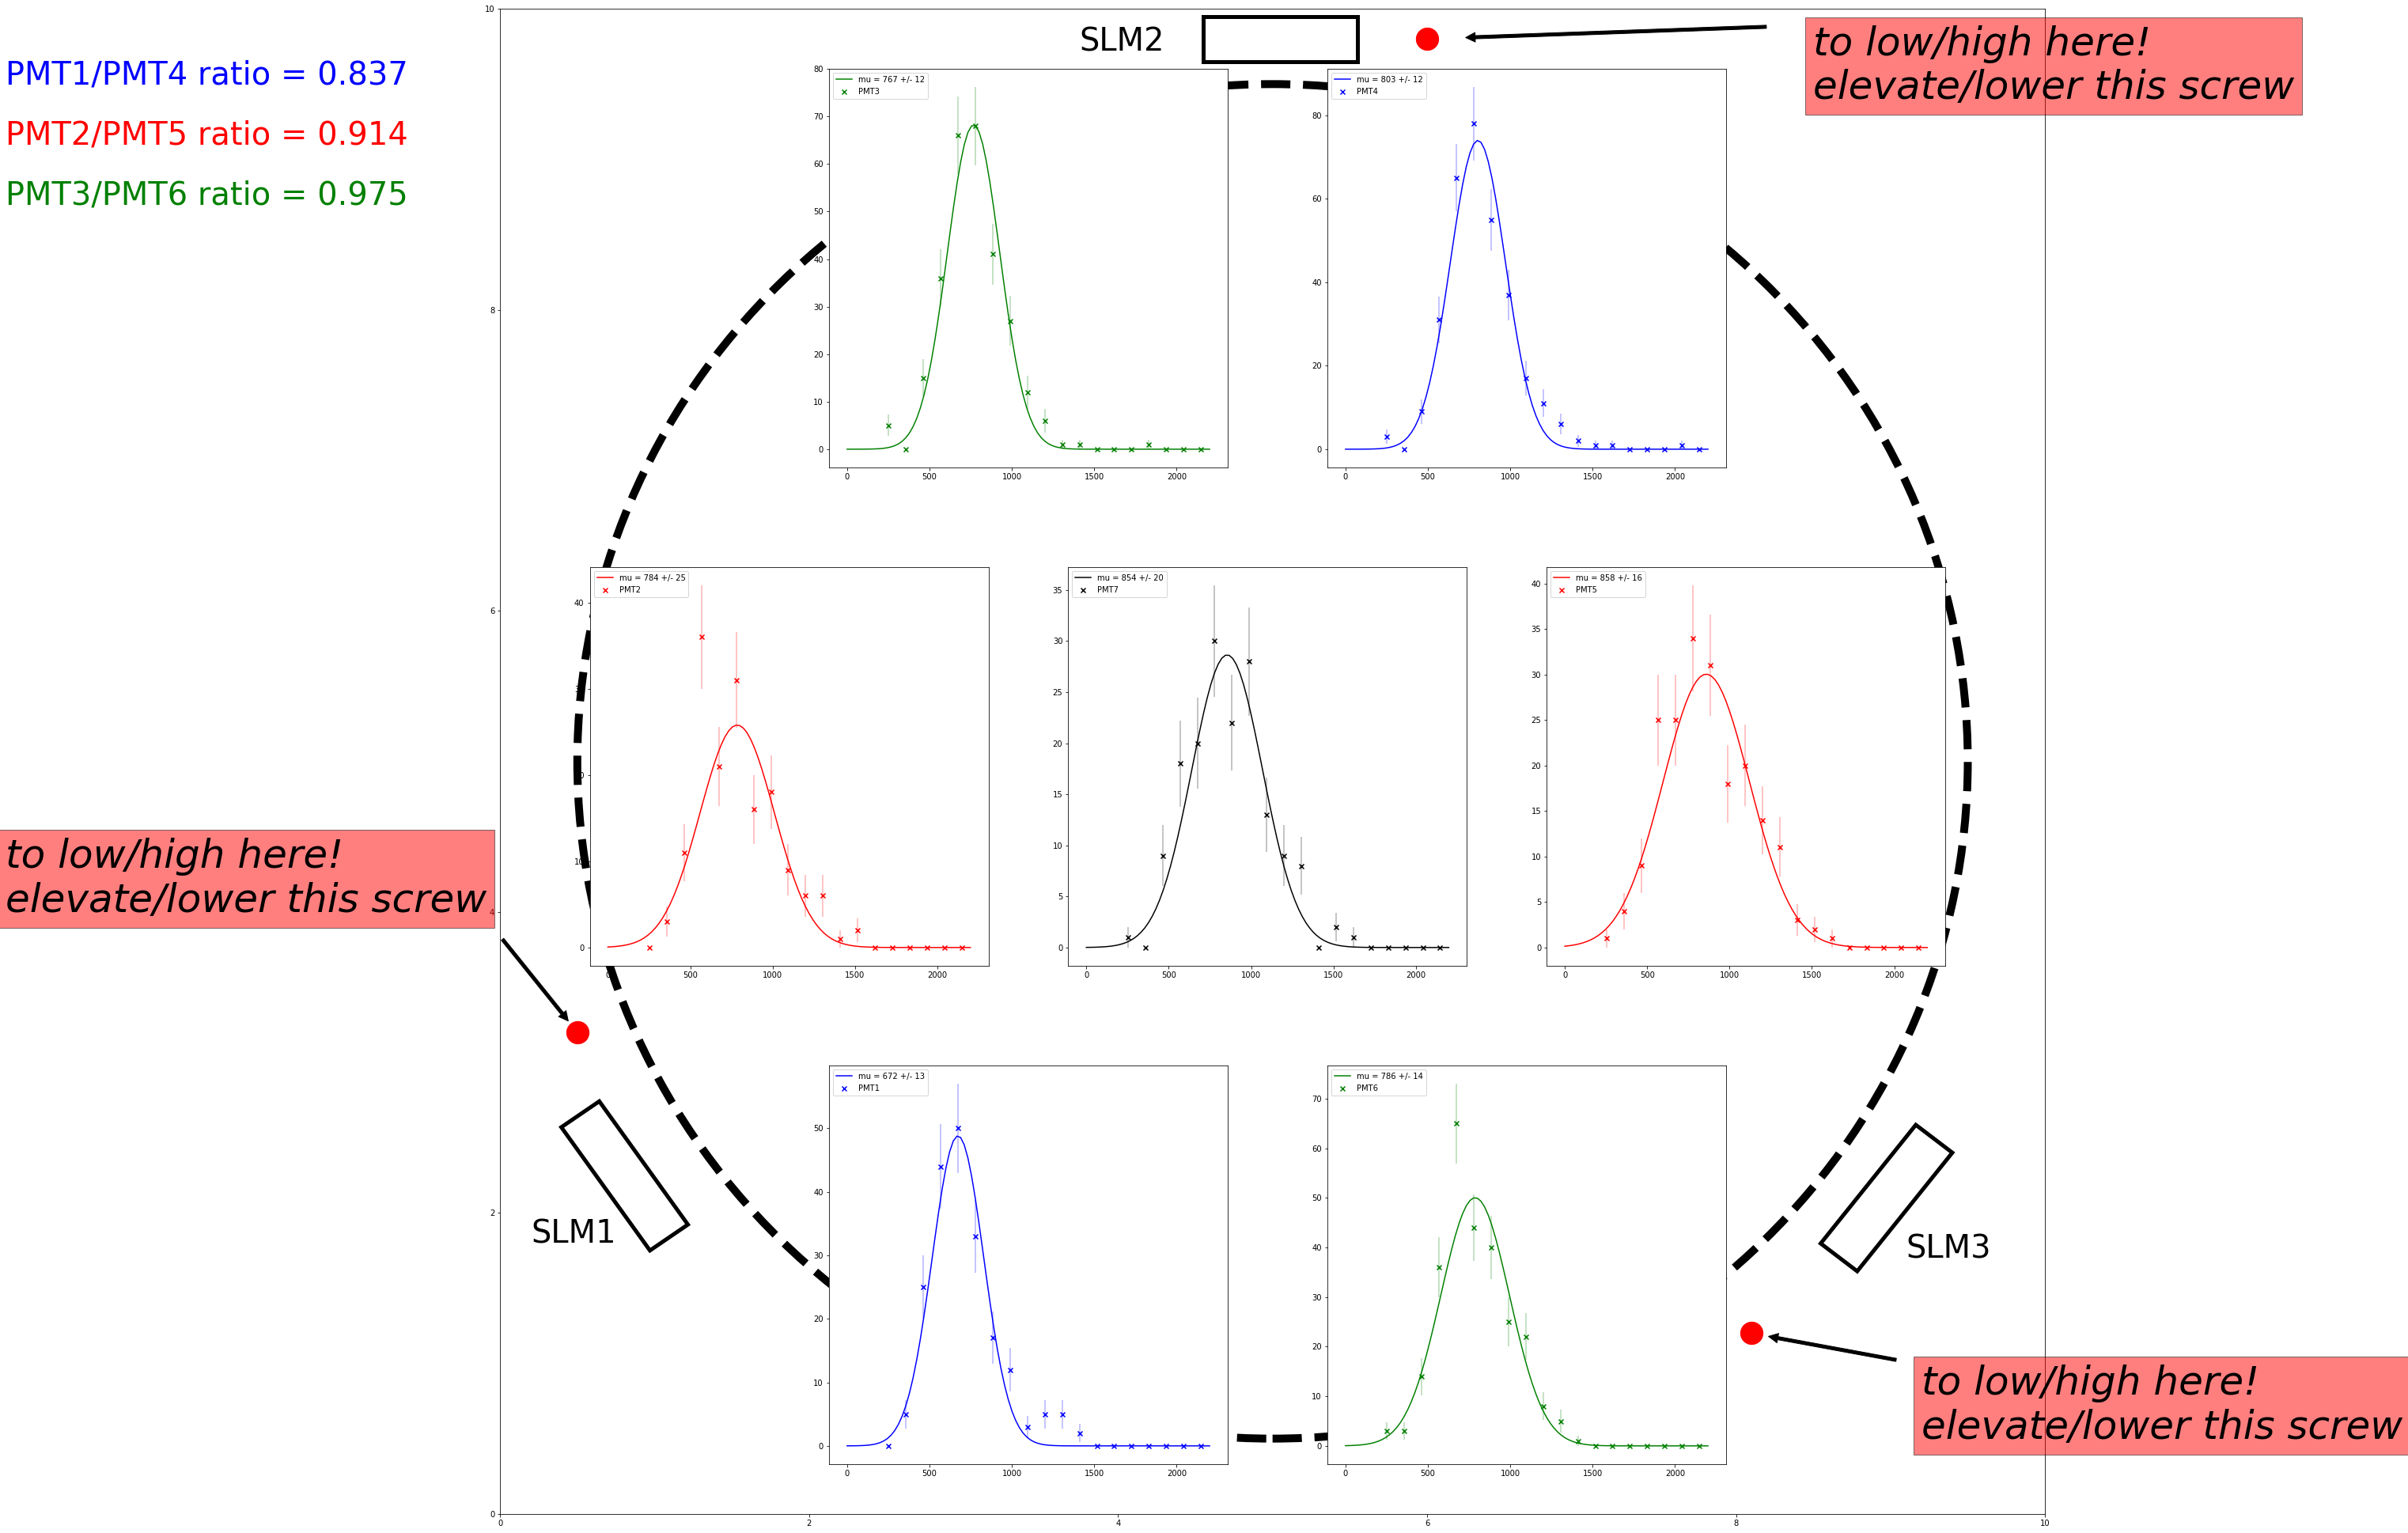

PMT1 width:  672.946281706254       number of entries:  208
PMT4 width:  803.6643580795884       number of entries:  334
PMT2 width:  784.7662443718875        number of entries:  162
PMT5 width:  858.8744059775389       number of entries:  202
PMT3 width:  767.4071981444814       number of entries:  286
PMT6 width:  786.8846471644194       number of entries:  280
PMT1/PMT4 ratio should be close to 1:  0.837
PMT2/PMT5 ratio should be close to 1:  0.914
PMT3/PMT6 ratio should be close to 1:  0.975


In [59]:
fig, ax0 = plt.subplots(figsize=(35, 35))

Ratio1_4 = popt1[1]/popt4[1]
Ratio2_5 = popt2[1]/popt5[1]
Ratio3_6 = popt3[1]/popt6[1]
# Ratio1_4 = str(Ratio1_4)
Ratio1_4 = str("%0.3f" % Ratio1_4)
Ratio2_5 = str("%0.3f" % Ratio2_5)
Ratio3_6 = str("%0.3f" % Ratio3_6)


reflector  = plt.Circle((5, 5), 4.5, color='black',linestyle ='--', linewidth='10', fill = False)
left1, bottom1, width1, height1 = [0.29, 0.15, 0.2, 0.2]
left2, bottom2, width2, height2 = [0.17, 0.4, 0.2, 0.2]
left3, bottom3, width3, height3 = [0.29, 0.65, 0.2, 0.2]
left4, bottom4, width4, height4 = [0.54, 0.65, 0.2, 0.2]
left5, bottom5, width5, height5 = [0.65, 0.4, 0.2, 0.2]
left6, bottom6, width6, height6 = [0.54, 0.15, 0.2, 0.2]
left7, bottom7, width7, height7 = [0.41, 0.4, 0.2, 0.2]
ax0.set_xlim([0,10])
ax0.set_ylim([0,10])
ax0.add_artist(reflector)


SLM1 = Rectangle((0.97, 1.75), 0.3, 1, angle=35.0, fill = False, linewidth = '5')
SLM2 = Rectangle((4.55, 9.65), 1, 0.3, angle=0, fill = False, linewidth = '5')
SLM3 = Rectangle((9.4, 2.4), 0.3, 1, angle=142.0, fill = False, linewidth = '5')
ax0.add_patch(SLM1)
ax0.add_patch(SLM2)
ax0.add_patch(SLM3)


ax0.scatter([0.5], [3.2], s=800, c='r', marker='o', alpha=1)
ax0.scatter([8.1], [1.2], s=800, c='r', marker='o', alpha=1)
ax0.scatter([6], [9.8], s=800, c='r', marker='o', alpha=1)


ax0.text(-3.2, 9.5, 'PMT1/PMT4 ratio = '+str(Ratio1_4), fontsize=40, color = 'blue')
ax0.text(-3.2, 9.1, 'PMT2/PMT5 ratio = '+str(Ratio2_5), fontsize=40, color = 'red')
ax0.text(-3.2, 8.7, 'PMT3/PMT6 ratio = '+str(Ratio3_6), fontsize=40, color = 'green')

ax0.text(0.2, 1.8, 'SLM1', fontsize=40, color = 'black')
ax0.text(3.75, 9.72, 'SLM2', fontsize=40, color = 'black')
ax0.text(9.1, 1.7, 'SLM3', fontsize=40, color = 'black')



ax1 = fig.add_axes([left1, bottom1, width1, height1])
ax1.scatter(bincenters1, n1, c ='b', marker = 'x', label = 'PMT1')
ax1.plot(x_range,single_gaus(x_range,*popt1), color = 'blue', label ='mu = '+str(int(popt1[1]))+' +/- '+str(int(perr1[1])))
ax1.legend(prop={'size': 10}, loc = 'upper left')
ax1.errorbar(bincenters1, n1, yerr=np.sqrt(n1), ecolor='blue', marker= '.', mec='blue', mfc= 'blue', alpha = 0.3, linestyle='None')

ax2 = fig.add_axes([left2, bottom2, width2, height2])
ax2.scatter(bincenters2, n2, c='r', marker = 'x', label = 'PMT2')
ax2.plot(x_range, single_gaus(x_range, *popt2), color = 'red', label ='mu = '+str(int(popt2[1]))+' +/- '+str(int(perr2[1])))
ax2.legend(prop={'size': 10}, loc = 'upper left')
ax2.errorbar(bincenters2, n2, yerr=np.sqrt(n2), ecolor='red', marker= '.', mec='red', mfc= 'red', alpha = 0.3, linestyle='None')

ax3 = fig.add_axes([left3, bottom3, width3, height3])
ax3.scatter(bincenters3, n3, c ='g', marker = 'x', label = 'PMT3')
ax3.plot(x_range,single_gaus(x_range,*popt3), color = 'green', label ='mu = '+str(int(popt3[1]))+' +/- '+str(int(perr3[1])))
ax3.legend(prop={'size': 10}, loc = 'upper left')
ax3.errorbar(bincenters3, n3, yerr=np.sqrt(n3), ecolor='green', marker= '.', mec='green', mfc= 'green', alpha = 0.3, linestyle='None')

ax4 = fig.add_axes([left4, bottom4, width4, height4])
ax4.scatter(bincenters4, n4, c ='b', marker = 'x', label = 'PMT4')
ax4.plot(x_range,single_gaus(x_range,*popt4), color = 'blue', label ='mu = '+str(int(popt4[1]))+' +/- '+str(int(perr4[1])))
ax4.legend(prop={'size': 10}, loc = 'upper left')
ax4.errorbar(bincenters4, n4, yerr=np.sqrt(n4), ecolor='blue', marker= '.', mec='blue', mfc= 'blue', alpha = 0.3, linestyle='None')

ax5 = fig.add_axes([left5, bottom5, width5, height5])
ax5.scatter(bincenters5, n5, c='r', marker = 'x', label = 'PMT5')
ax5.plot(x_range, single_gaus(x_range, *popt5), color = 'red', label ='mu = '+str(int(popt5[1]))+' +/- '+str(int(perr5[1])))
ax5.legend(prop={'size': 10}, loc = 'upper left')
ax5.errorbar(bincenters5, n5, yerr=np.sqrt(n5), ecolor='red', marker= '.', mec='red', mfc= 'red', alpha = 0.3, linestyle='None')

ax6 = fig.add_axes([left6, bottom6, width6, height6])
ax6.scatter(bincenters6, n6, c = 'g', marker = 'x', label = 'PMT6' )
ax6.plot(x_range, single_gaus(x_range, *popt6), color = 'green', label ='mu = '+str(int(popt6[1]))+' +/- '+str(int(perr6[1])))
ax6.legend(prop={'size': 10}, loc = 'upper left')
ax6.errorbar(bincenters6, n6, yerr=np.sqrt(n6), ecolor='green', marker= '.', mec='green', mfc= 'green', alpha = 0.3, linestyle='None')

ax7 = fig.add_axes([left7, bottom7, width7, height7])
ax7.scatter(bincenters7, n7, c = 'black', marker = 'x', label = 'PMT7' )
ax7.plot(x_range, single_gaus(x_range, *popt7), color = 'black', label ='mu = '+str(int(popt7[1]))+' +/- '+str(int(perr7[1])))
ax7.legend(prop={'size': 10}, loc = 'upper left')
ax7.errorbar(bincenters7, n7, yerr=np.sqrt(n7), ecolor='black', marker= '.', mec='black', mfc= 'black', alpha = 0.3, linestyle='None')

Ratio1_4 = float(Ratio1_4)
Ratio2_5 = float(Ratio2_5)
Ratio3_6 = float(Ratio3_6)

if Ratio1_4 < 1:
    ax0.annotate('to low/high here! \nelevate/lower this screw', xy=(0.5, 3.2), xytext=(-3.2, 4),
            arrowprops=dict(facecolor='black', shrink=0.1),style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10}, fontsize = 50, color = 'black')
if Ratio2_5 < 1:
    ax0.annotate('to low/high here! \nelevate/lower this screw', xy=(8.1, 1.2), xytext=(9.2,0.5),
            arrowprops=dict(facecolor='black', shrink=0.1), style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10}, fontsize = 50, color = 'black')
if Ratio3_6 < 1:
    ax0.annotate('to low/high here! \nelevate/lower this screw', xy=(6, 9.8), xytext=(8.5, 9.4),
            arrowprops=dict(facecolor='black', shrink=0.1),style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10}, fontsize = 50, color = 'black')
    
   

plt.show()

#ax0.text(-1, 1, 'boxed italics text in data coords', style='italic',bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

print('PMT1 width: ', popt1[1], '      number of entries: ', len(PMT1_width))
print('PMT4 width: ', popt4[1], '      number of entries: ', len(PMT4_width))
print('PMT2 width: ', popt2[1], '       number of entries: ', len(PMT2_width))
print('PMT5 width: ', popt5[1], '      number of entries: ', len(PMT5_width))
print('PMT3 width: ', popt3[1], '      number of entries: ', len(PMT3_width))
print('PMT6 width: ', popt6[1], '      number of entries: ', len(PMT6_width))
print('PMT1/PMT4 ratio should be close to 1: ', Ratio1_4)
print('PMT2/PMT5 ratio should be close to 1: ', Ratio2_5)
print('PMT3/PMT6 ratio should be close to 1: ', Ratio3_6)